# Classification with BP - banknote authentication

## TenserFlow

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import KFold
import tensorflow.keras as kr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [22]:
from google.colab import files
uploaded = files.upload()

Saving data_banknote_authentication.txt to data_banknote_authentication.txt


In [3]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "seeds_dataset.txt" with length 9288 bytes


In [23]:
filename1 = 'data_banknote_authentication.txt'
data = pd.read_csv(filename1, delimiter=',', header=None)

banknote_authentication_df = pd.DataFrame(data)
banknote_authentication_df.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [25]:
banknote_authentication_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1372 non-null   float64
 1   1       1372 non-null   float64
 2   2       1372 non-null   float64
 3   3       1372 non-null   float64
 4   4       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [26]:
banknote_authentication_df.describe()

,0,1,2,3,4
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [27]:
banknote_authentication_df[4].value_counts()

0    762
1    610
Name: 4, dtype: int64

<a id="cv"></a>
## Cross validation (using Keras)

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/350
26/26 [==============================] - 1s 2ms/step - loss: 0.2329 - acc: 0.5511
Epoch 2/350
26/26 [==============================] - 0s 2ms/step - loss: 0.2222 - acc: 0.5511
Epoch 3/350
26/26 [==============================] - 0s 2ms/step - loss: 0.2126 - acc: 0.5633
Epoch 4/350
26/26 [==============================] - 0s 2ms/step - loss: 0.2043 - acc: 0.6521
Epoch 5/350
26/26 [==============================] - 0s 2ms/step - loss: 0.1960 - acc: 0.7470
Epoch 6/350
26/26 [==============================] - 0s 2ms/step - loss: 0.1873 - acc: 0.8041
Epoch 7/350
26/26 [==============================] - 0s 2ms/step - loss: 0.1788 - acc: 0.8139
Epoch 8/350
26/26 [==============================] - 0s 2ms/step - loss: 0.1703 - acc: 0.8200
Epoch 9/350
26/26 [==============================] - 0s 2ms/step - loss: 0.1628 - acc: 0.8504
Epoch 10/350
26/26 [==============================] - 0s 

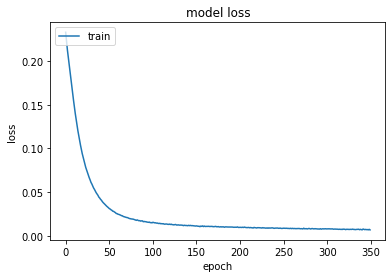

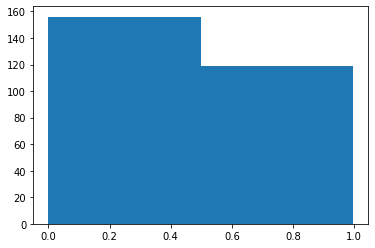

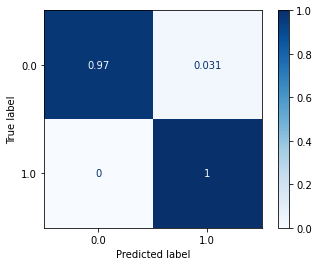

Confusion matrix:
 [[156   5]
 [  0 114]]
Percentage classification error obtained from validation set: 1.8181818181818181%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/350
26/26 [==============================] - 0s 1ms/step - loss: 0.2528 - acc: 0.4629
Epoch 2/350
26/26 [==============================] - 0s 2ms/step - loss: 0.2492 - acc: 0.5419
Epoch 3/350
26/26 [==============================] - 0s 1ms/step - loss: 0.2475 - acc: 0.5674
Epoch 4/350
26/26 [==============================] - 0s 1ms/step - loss: 0.2465 - acc: 0.5687
Epoch 5/350
26/26 [==============================] - 0s 2ms/step - loss: 0.2460 - acc: 0.5687
Epoch 6/350
26/26 [==============================] - 0s 2ms/step - loss: 0.2456 - acc: 0.5687
Epoch 7/350
26/26 [==============================] - 0s 2ms/step - loss: 0.2453 - acc: 0.5687
Epoch 8/350
26/26 [==============================] - 0s 2ms/step - loss: 0.2451 - acc: 0.5687
Epoch 9/350
26/26 [========

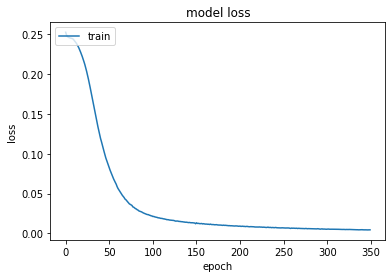

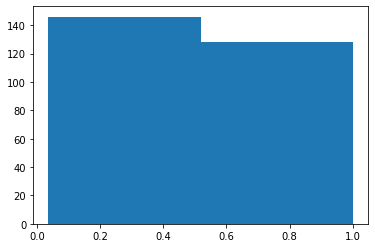

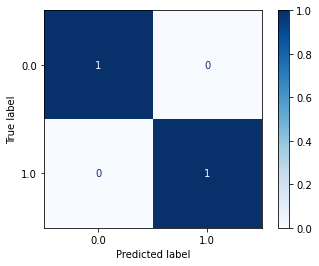

Confusion matrix:
 [[146   0]
 [  0 128]]
Percentage classification error obtained from validation set: 0.0%
------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/350
26/26 [==============================] - 0s 2ms/step - loss: 0.2434 - acc: 0.6428
Epoch 2/350
26/26 [==============================] - 0s 2ms/step - loss: 0.2411 - acc: 0.6294
Epoch 3/350
26/26 [==============================] - 0s 1ms/step - loss: 0.2383 - acc: 0.6391
Epoch 4/350
26/26 [==============================] - 0s 2ms/step - loss: 0.2347 - acc: 0.6501
Epoch 5/350
26/26 [==============================] - 0s 2ms/step - loss: 0.2309 - acc: 0.6914
Epoch 6/350
26/26 [==============================] - 0s 2ms/step - loss: 0.2278 - acc: 0.6974
Epoch 7/350
26/26 [==============================] - 0s 2ms/step - loss: 0.2246 - acc: 0.6999
Epoch 8/350
26/26 [==============================] - 0s 1ms/step - loss: 0.2211 - acc: 0.7023
Epoch 9/350
26/26 [=======================

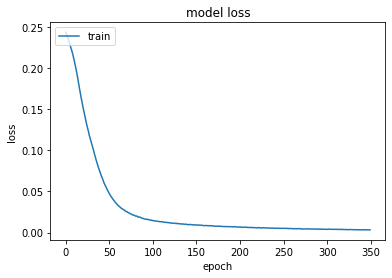

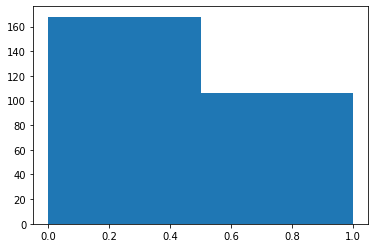

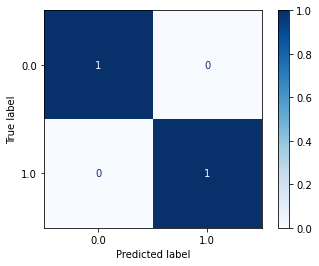

Confusion matrix:
 [[168   0]
 [  0 106]]
Percentage classification error obtained from validation set: 0.0%
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/350
26/26 [==============================] - 0s 2ms/step - loss: 0.2387 - acc: 0.5772
Epoch 2/350
26/26 [==============================] - 0s 2ms/step - loss: 0.2339 - acc: 0.5772
Epoch 3/350
26/26 [==============================] - 0s 1ms/step - loss: 0.2313 - acc: 0.5772
Epoch 4/350
26/26 [==============================] - 0s 1ms/step - loss: 0.2290 - acc: 0.5772
Epoch 5/350
26/26 [==============================] - 0s 2ms/step - loss: 0.2263 - acc: 0.5772
Epoch 6/350
26/26 [==============================] - 0s 2ms/step - loss: 0.2237 - acc: 0.5772
Epoch 7/350
26/26 [==============================] - 0s 2ms/step - loss: 0.2207 - acc: 0.5772
Epoch 8/350
26/26 [==============================] - 0s 2ms/step - loss: 0.2175 - acc: 0.5966
Epoch 9/350
26/26 [=======================

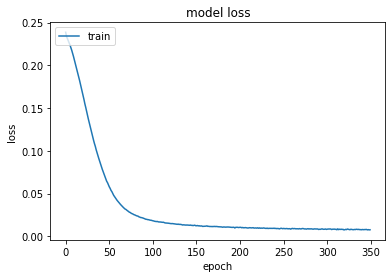

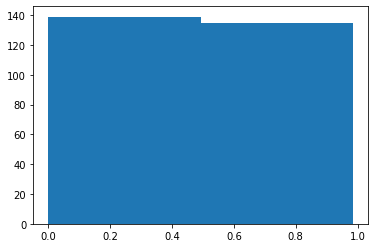

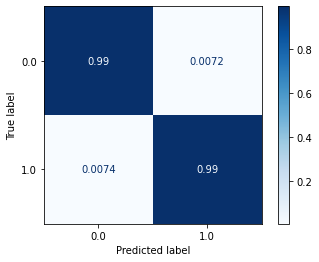

Confusion matrix:
 [[138   1]
 [  1 134]]
Percentage classification error obtained from validation set: 0.7299270072992701%

Results of cross validation:
------------------------------------------------------------------------
Percentage classification error obtained from validation set per fold
------------------------------------------------------------------------
> Fold 1 - 1.8181818181818181%
------------------------------------------------------------------------
> Fold 2 - 0.0%
------------------------------------------------------------------------
> Fold 3 - 0.0%
------------------------------------------------------------------------
> Fold 4 - 0.7299270072992701%
------------------------------------------------------------------------
Mean percentage classification error obtained from cross validation:
> 0.637027206370272% (+- 0.7442049303330632)
------------------------------------------------------------------------


In [41]:
learning_rate = 0.05  # learning rate
momentum = 0.1       # momentum
nn = [4, 20, 5, 1]  # number of neurons for each layer

fold_no = 1

cv_percentage_classification_errors = list()

# 4-fold cross-validation
kf = KFold(n_splits=4, shuffle=True)
for train, validation in kf.split(X_train):
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    model = kr.Sequential()

    l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))
    l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))
    l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

    model.compile(loss='mse', optimizer=kr.optimizers.SGD(learning_rate=learning_rate, momentum=momentum), metrics=['acc'])

    history = model.fit(X_train[train], y_train[train], epochs=350)

    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()

    y_pred = model.predict(X_train[validation])
    plt.hist(y_pred, bins=2)

    threshold = 0.5
    y_pred = np.where(y_pred > threshold, 1,0)

    disp = ConfusionMatrixDisplay.from_predictions(y_train[validation], y_pred,
                                                    cmap=plt.cm.Blues,
                                                    normalize='true')
    plt.show()

    cm = confusion_matrix(y_train[validation], y_pred)
    print('Confusion matrix:\n', cm)

    percentage_classification_error = 100 * ((cm[0][1] + cm[1][0]) / (cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0]))
    print(f'Percentage classification error obtained from validation set: {percentage_classification_error}%')
    
    cv_percentage_classification_errors.append(percentage_classification_error)

    fold_no = fold_no + 1

print('\nResults of cross validation:')
print('------------------------------------------------------------------------')
print('Percentage classification error obtained from validation set per fold')
for i in range(0, len(cv_percentage_classification_errors)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - {cv_percentage_classification_errors[i]}%')
print('------------------------------------------------------------------------')
print('Mean percentage classification error obtained from cross validation:')
print(f'> {np.mean(cv_percentage_classification_errors)}% (+- {np.std(cv_percentage_classification_errors)})')
print('------------------------------------------------------------------------')

<a id="training"></a>
## Training (using Keras)

Epoch 1/350
35/35 [==============================] - 0s 1ms/step - loss: 0.2484 - acc: 0.5451
Epoch 2/350
35/35 [==============================] - 0s 1ms/step - loss: 0.2457 - acc: 0.5597
Epoch 3/350
35/35 [==============================] - 0s 2ms/step - loss: 0.2432 - acc: 0.5597
Epoch 4/350
35/35 [==============================] - 0s 1ms/step - loss: 0.2395 - acc: 0.5597
Epoch 5/350
35/35 [==============================] - 0s 1ms/step - loss: 0.2355 - acc: 0.5597
Epoch 6/350
35/35 [==============================] - 0s 2ms/step - loss: 0.2314 - acc: 0.5597
Epoch 7/350
35/35 [==============================] - 0s 1ms/step - loss: 0.2266 - acc: 0.5624
Epoch 8/350
35/35 [==============================] - 0s 1ms/step - loss: 0.2207 - acc: 0.5825
Epoch 9/350
35/35 [==============================] - 0s 1ms/step - loss: 0.2125 - acc: 0.6290
Epoch 10/350
35/35 [==============================] - 0s 2ms/step - loss: 0.2002 - acc: 0.7156
Epoch 11/350
35/35 [==============================] - 0s 1m

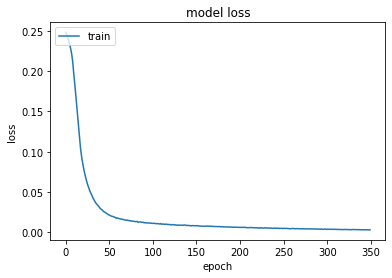

In [44]:
learning_rate = 0.05  # learning rate
momentum = 0.1       # momentum
nn = [4, 20, 5, 1]  # number of neurons for each layer

model = kr.Sequential()

l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))
l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))
l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

model.compile(loss='mse', optimizer=kr.optimizers.SGD(learning_rate=learning_rate, momentum=momentum), metrics=['acc'])

history = model.fit(X_train, y_train, epochs=350)

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

<a id="test"></a>
## Test (using Keras)

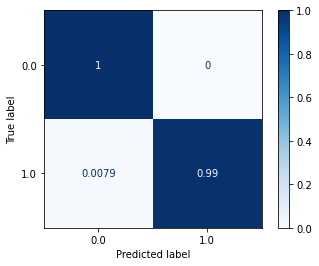

Confusion matrix:
 [[148   0]
 [  1 126]]
Percentage classification error obtained from test set: 0.36363636363636365%


In [45]:
y_pred = model.predict(X_test)

threshold = 0.5
y_pred = np.where(y_pred > threshold, 1,0)

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
																								cmap=plt.cm.Blues,
																								normalize='true')
plt.show()

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

percentage_classification_error = 100 * ((cm[0][1] + cm[1][0]) / (cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0]))
print(f'Percentage classification error obtained from test set: {percentage_classification_error}%')

In [46]:
y_pred = np.concatenate(y_pred, axis=0)

banknote_bp_results = { 'real_value': y_test,
                    'prediction': y_pred}
  
df = pd.DataFrame(banknote_bp_results)

df.to_csv('banknote_bp_results.csv')

In [47]:
weights = model.get_weights()
np.savetxt('banknote_bp_model_weights.csv', weights, fmt='%s', delimiter=',')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [48]:
# serialize model to JSON
model_json = model.to_json()
with open("banknote_bp_model.json", "w") as json_file:
    json_file.write(model_json)